In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
# Setup
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load processed BOA reviews
df = pd.read_csv('../data/processed/boa_clean_reviews.csv')
df['date'] = pd.to_datetime(df['date'])  # ensure datetime
df.head()


[nltk_data] Downloading package stopwords to C:\Users\Alem The
[nltk_data]     Kal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,review,rating,thumbsUpCount,app_version,date,bank,clean_review,sentiment
0,937102c6-ae88-419c-994b-80e520faacb8,Phillmon Haftom,it's not working,3,0,25.05.03,2025-06-05 11:57:36,Bank of Abyssinia,its not working,0.000000
1,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,Bank of Abyssinia,hello im facing a problem with the boa mobile ...,0.033333
2,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,exceptional,5,0,NaN,2025-06-03 10:32:35,Bank of Abyssinia,exceptional,0.666667
3,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,Bank of Abyssinia,boa mobile good bank,0.700000
4,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,Bank of Abyssinia,this is worest app loading,0.000000


Total reviews: 573
Date range: 2024-11-12 to 2025-06-05
Average rating: 3.24


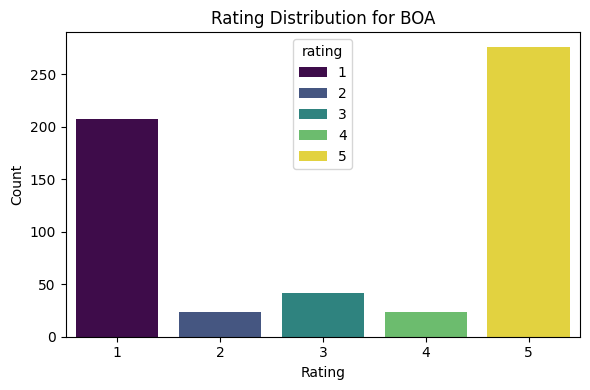

In [3]:
print("Total reviews:", len(df))
print("Date range:", df['date'].min().date(), "to", df['date'].max().date())
print("Average rating:", round(df['rating'].mean(), 2))

# Rating distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', palette='viridis', hue='rating')
plt.title('Rating Distribution for BOA')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [4]:
def get_top_ngrams(texts, n=10, ngram_range=(2, 2)):
    """Compute top n-grams from text series."""
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english', max_features=200)
    X = vectorizer.fit_transform(texts.dropna())
    feature_names = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0).A1
    ngrams = sorted(zip(feature_names, counts), key=lambda x: x[1], reverse=True)[:n]
    return ngrams
top_trigrams = get_top_ngrams(df['review'], n=10, ngram_range=(3, 3))

print('\nTop 10 Trigrams for Bank of Abyssinia:')
for term, count in top_trigrams:
    print(f'{term}: {count}')



Top 10 Trigrams for Bank of Abyssinia:
turn developer options: 9
app android phone: 6
app closes automatically: 6
mobile banking app: 6
switch developer options: 6
worst mobile banking: 6
a51 just gives: 3
aadan axmed barkhadle: 3
able solve issue: 3
absurd avoid bank: 3


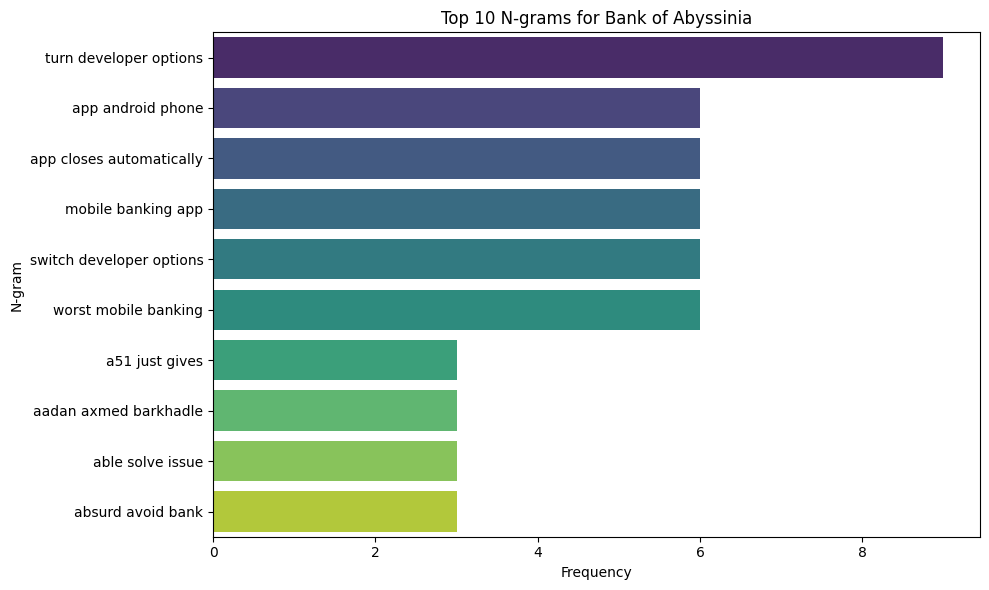

In [5]:
terms, counts = zip(*top_trigrams)
plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=terms, palette='viridis', hue=terms)
plt.title('Top 10 N-grams for Bank of Abyssinia')
plt.xlabel('Frequency')
plt.ylabel('N-gram')
plt.tight_layout()
plt.show()

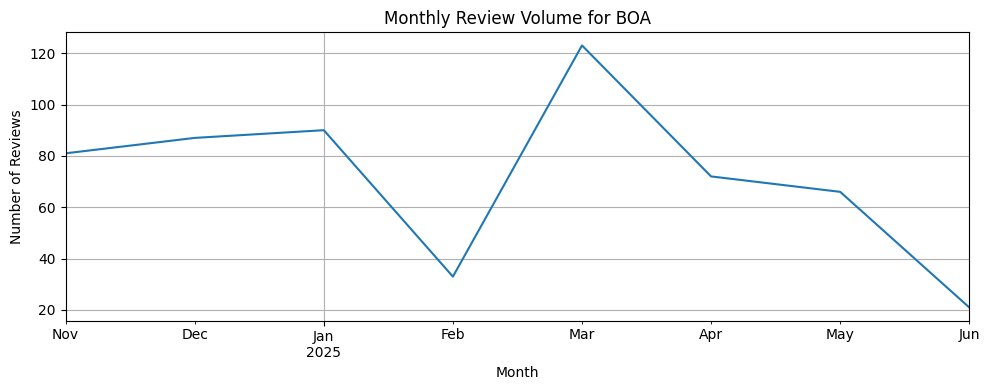

In [6]:
# Reviews per month
df_monthly = df.resample('ME', on='date').size()

plt.figure(figsize=(10,4))
df_monthly.plot()
plt.title('Monthly Review Volume for BOA')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


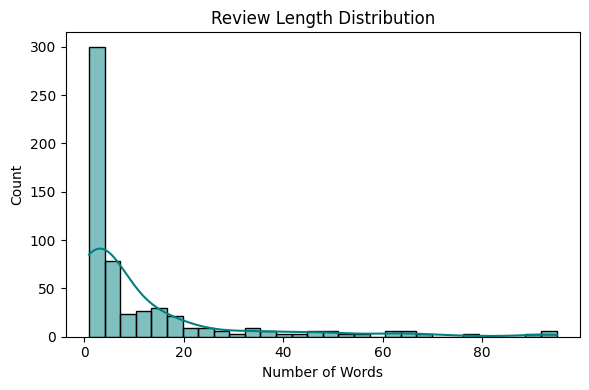

In [7]:
df['review_length'] = df['review'].apply(lambda x: len(str(x).split()))

# Review length distribution
plt.figure(figsize=(6,4))
sns.histplot(df['review_length'], bins=30, kde=True, color='teal')
plt.title('Review Length Distribution')
plt.xlabel('Number of Words')
plt.tight_layout()
plt.show()


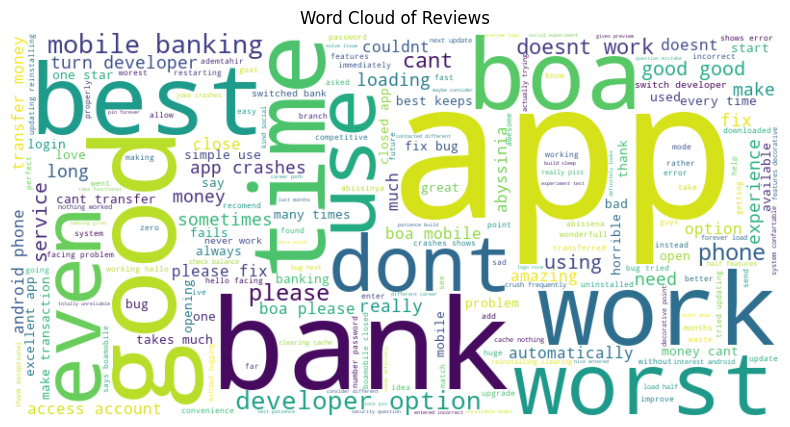

In [8]:
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', str(text).lower())  # remove non-letters
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

all_text = ' '.join(df['review'].dropna().map(preprocess_text))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()
